<p><img src="comunemilano.jpg" alt="Milano Logo" style="float:left;width:150px;height:150px;">
<h1 align=center><font size = 10>Family-Friendly neighbourhoods in Milano</font></h1></p>
<hr>

## Background

Milano, is the Business and Financial capital of Italy. Most important companies have their Italian Head-Quarter in Milano.  That means a lot of people move in Milan to find the best working place, and to improve their career

Starting from Expo ’15 Milano is Living a fast growing period in terms of business opportunities, and that is increasing tourism, the born of new companies, and obviously, people who decide to live here.

Milano, is well know also for its “Movida”, and is full of restaurants, pubs, discos, also its cultural offer is huge, with its museums, theatres and university.

## Business Problem

In a city with a business heart, that is living a fast-growing period, finding the best place to live with young children is becoming really hard, especially if you don’t know the city, because you are relocating here for work reasons.

The question to answer, thus, is:
<h6 align=center><font size = 4 color = blue>“which is the most family-friendly neighbourhood in Milano?”</font></h6>

## Target

The target is huge and include:

 + Families living in Milan who are looking for a new location which fits better their needs

 + Families moving to Milan 

 + Real Estate Agencies, in order to provide a better service to their clients

<hr>

## Data description

The municipality of Milano, provides a web portal where it is possible to have access to several dataset: http://dati.comune.milano.it/

Data are available in different format:

 + csv
 + JSON
 + Geojson
 
### Milano: administrative division
<div>
<p><img src="MunicipalityMilano.png" alt="Milano Logo" style="float:left;width:300px; margin-right:20px">
The municipality of Milan is divided into 9 Municipi (municipality). Each Municipio contains a variable number of Quartieri (neighbourhoods).

This is the administrative division of the municipality.

From the point of view of the population and services census, Milan is divided into 88 NIL (local identity nucleus), and all available data refer to this variable.

Therefore we take NIL as Neighbourhoods, and municipality as Borough <br>
</p>
</div>

### Family-Friendly concept

In order to find which is the neighbourhood most family friendly, following some surveys results found in the web, we took into the account following parameters:

 1. Number of schools 
     * Kindergartens
     * Primary Schools
     * Secondary Schools
 2. Number of Paediatricians

Once we have ranked neighbourhoods, we use Foursquare venues location in order to clustering that and to find the place which fits also parents expectations and needs.

### Data sources

Here all data used to carry out analysis:

 + [Geocoded Street List with reference to NIL](http://dati.comune.milano.it/dataset/5c6519f6-6d26-41c9-b53b-6106e08d1b90/resource/89562e43-a054-4563-aab5-0449df7e9155/download/ds634_civici_quartieri_zone_nil_cap_vie_20180518-unicode.csv)
 
 + [Peadiatricians list](http://dati.comune.milano.it/dataset/c3709838-21c8-4ddb-a910-dff6455894bb/resource/d9a5ed54-b8cd-4a04-b07b-914e10849c54/download/ds298_primaria_quartiere-cittad.csv)
 
 + [Kindergartens](http://dati.comune.milano.it/dataset/836d6a8c-c266-43bf-a3e4-16f382c4d9d8/resource/11e0d884-5032-4244-b79a-3567ce3efd2e/download/ds297_infanzia_quartiere-cittad.csv)
 
 + [Primary Schools](http://dati.comune.milano.it/dataset/c3709838-21c8-4ddb-a910-dff6455894bb/resource/d9a5ed54-b8cd-4a04-b07b-914e10849c54/download/ds298_primaria_quartiere-cittad.csv)
 
 + [Secondary Schools](http://dati.comune.milano.it/dataset/28f7446d-7016-454d-9d27-781300a7ef38/resource/25c1faad-a14c-4fab-bc9c-010172beec9f/download/ds299_secondaria-i-grado_quartiere-cittad.csv)
 
<hr>

##  Methodology section

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Collect Inspection Data
2. Explore and Understand Data
3. Data preparation and preprocessing 
4. Modeling

<hr>

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. Download and Explore Dataset

    1. Milano administrative division
    2. Pediatricians
    3. Kindergartens
    4. Primary Schools
    5. Secondary Schools
    

2. Family-Friendly Index

3. Explore and Clustering Neighbouroods

4. Results and Discussion section  
    
5. Conclusion
    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import pandas as pd
import numpy as np
import folium
import requests
import json # library to handle JSON files
# geocoder
#!conda install -c conda-forge geocoder --yes #Uncomment this row to install geocoder in case you don't have it
import geocoder

#!conda install -c conda-forge geopy --yes # #Uncomment this row to install geocoder in case you don't have it
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import warnings; warnings.simplefilter('ignore')



## 1. Download and Explore Dataset

### A. Milano administrative division

In [2]:
# From official website of the municipality of Milan we get information about Borough and Neighborhood
df_milano = pd.read_csv('http://dati.comune.milano.it/dataset/5c6519f6-6d26-41c9-b53b-6106e08d1b90/resource/89562e43-a054-4563-aab5-0449df7e9155/download/ds634_civici_quartieri_zone_nil_cap_vie_20180518-unicode.csv',sep = ';')

In [3]:
print(df_milano.shape)
df_milano.head()

(57176, 12)


,CODICE_VIA,DUG,DENOMINAZIONE VIA,NUMERO CIVICO,BARRA2,CAP,COMUNE,ID_Qri,QUARTIERE,MUNICIPIO,ID_NIL,NIL
0,3135,Via,ABAMONTI GIUSEPPE,4,NaN,20129,MILANO,2,PORTA VENEZIA - BUENOS AIRES,3,21,BUENOS AIRES - VENEZIA
1,3135,Via,ABAMONTI GIUSEPPE,2,NaN,20129,MILANO,2,PORTA VENEZIA - BUENOS AIRES,3,21,BUENOS AIRES - VENEZIA
2,3135,Via,ABAMONTI GIUSEPPE,1,NaN,20129,MILANO,2,PORTA VENEZIA - BUENOS AIRES,3,21,BUENOS AIRES - VENEZIA
3,2558,Via,ABANO,10,NaN,20131,MILANO,9,CENTRALE - LORETO,3,20,LORETO
4,2558,Via,ABANO,11,NaN,20131,MILANO,9,CENTRALE - LORETO,3,20,LORETO


In [4]:
print('There are {} MUNICIPI and {} NIL'.format(df_milano['MUNICIPIO'].unique().size,df_milano['NIL'].unique().size))

There are 9 MUNICIPI and 88 NIL


In [5]:
#Investigate if some Neighbourhood is relateed to more than one Borough
df_milano[['QUARTIERE','MUNICIPIO']].drop_duplicates().groupby(['QUARTIERE'])['MUNICIPIO'].unique()

QUARTIERE
ACCURSIO - VILLAPIZZONE                                              [8]
AFFORI - BRUZZANO                                                    [9]
BAGGIO - MUGGIANO                                                    [7]
BANDE NERE - SELINUNTE                                            [7, 6]
BARONA                                                               [6]
BICOCCA - GRECO                                                   [9, 2]
BOSCO IN CITTA' - TRENNO - FIGINO                                 [7, 8]
BOVISASCA - COMASINA                                                 [9]
CENTRALE - LORETO                                                 [3, 2]
CENTRO                                                         [1, 9, 5]
CITTA' STUDI - LAMBRATE                                              [3]
CORSICA - FORLANINI                                               [4, 3]
CORVETTO - LODI - SCALO ROMANA                                    [5, 4]
EXPO - MAGGIORE                          

In [6]:
# From official website of the municipality of Milan we getLat Long of Borough and Neighborhood
df_milano_civici_coord = pd.read_csv('http://dati.comune.milano.it/dataset/5c6519f6-6d26-41c9-b53b-6106e08d1b90/resource/533b4e63-3d78-4bb5-aeb4-6c5f648f7f21/download/ds634_civici_coordinategeografiche_20200403_csv.zip', sep = ';')

In [7]:
print(df_milano_civici_coord.shape)
df_milano_civici_coord.head()


(63340, 38)


,CODICE_VIA,NUMERO,LETTERA,BARRA,BARRA2,NUMEROCOMPLETO,MUNICIPIO,RESIDENZIALE,STATOCIVICO,DATA_APPLICAZIONE,...,DESCRITTIVO,ANNCSU,OPENSTREETMAP,PROGANNCSU,CAP,ID_NIL,NIL,LONG_WGS84,LAT_WGS84,Location
0,1,21,NaN,,N08,21N08,1.0,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,NaN,NaN,NaN,9.189762,45.464840,"(45.464839928425675, 9.189761993000747)"
1,1,21,NaN,NaN,N05,21N05,1.0,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,NaN,NaN,NaN,9.189536,45.464845,"(45.464845483, 9.18953582351)"
2,1,21,NaN,NaN,N06,21N06,1.0,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,NaN,NaN,NaN,9.189633,45.464844,"(45.4648439154, 9.18963327725)"
3,1,21,NaN,NaN,N07,21N07,1.0,0,Iter in corso,NaN,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,NaN,NaN,NaN,9.189699,45.464842,"(45.4648420342, 9.18969913993)"
4,1,21,NaN,NaN,NaN,21,1.0,1,Applicato,20041231.0,...,DEL DUOMO,DEL DUOMO,DEL DUOMO,NaN,20121.0,1.0,DUOMO,9.189584,45.464843,"(45.4648429994, 9.18958370282)"


In [8]:
# We proceed with the data Cleaning in order to obtain a dataset countaining only Borough and NIL lat long.
#This will be the dataset on which we will perrform analysis
df_milano2 = df_milano_civici_coord[['CODICE_VIA','NUMEROCOMPLETO','MUNICIPIO','RESIDENZIALE','TIPO','DESCRITTIVO','ANNCSU','LAT_WGS84','LONG_WGS84','Location']]
df_milano3 = df_milano2.groupby(['MUNICIPIO','CODICE_VIA','NUMEROCOMPLETO'])['LAT_WGS84','LONG_WGS84'].mean().reset_index()
df_milano_unique =df_milano[['MUNICIPIO','QUARTIERE','CODICE_VIA', 'NUMERO CIVICO', 'ID_NIL', 'NIL']].drop_duplicates().set_index(['CODICE_VIA', 'NUMERO CIVICO']).sort_index()
df_milano_unique.head(20)
df_joint = df_milano3.join(df_milano_unique, on = ['CODICE_VIA', 'NUMEROCOMPLETO'], how= 'inner', rsuffix = '_y')
df_joint=df_joint.groupby(['MUNICIPIO_y','QUARTIERE', 'NIL', 'ID_NIL'])['LAT_WGS84','LONG_WGS84'].mean().reset_index()
print(df_joint.shape)
df_joint.head()
df_joint[['QUARTIERE','MUNICIPIO_y']].drop_duplicates().groupby(['QUARTIERE'])['MUNICIPIO_y'].unique()
df_joint[['QUARTIERE','MUNICIPIO_y']].drop_duplicates().groupby(['QUARTIERE']).count().values.sum()
df_neighborhood =df_joint.rename(columns={'MUNICIPIO_y':'Borough','QUARTIERE':'Borough Name','LAT_WGS84':'Latitude','LONG_WGS84':'Longitude'})
df_neighborhood.head()

(109, 6)


,Borough,Borough Name,NIL,ID_NIL,Latitude,Longitude
0,1,CENTRO,BRERA,2,45.473304,9.187425
1,1,CENTRO,DUOMO,1,45.463219,9.187044
2,1,CENTRO,GUASTALLA,4,45.463466,9.202275
3,1,CENTRO,Giardini Pta Venezia,3,45.474078,9.201522
4,1,CENTRO,MAGENTA - S. VITTORE,7,45.463442,9.171132


### B. Pediatrician

In [9]:
# From official website of the municipality of Milan we the number of pediatricians per NIL
pediatrician = pd.read_csv('http://dati.comune.milano.it/dataset/b48fdaec-a868-47a8-8b59-fc9ed65c84a4/resource/22b05e1f-c5d2-4468-90e5-c098977856ef/download/ds235_sociale_pediatri_libera_scelta_2014_.csv', sep = ';',encoding = "ISO-8859-1")

In [10]:
pediatrician.head()

,Zona,IdNil,Nil,Distretto_ASL,Cognome,Nome,Indirizzo
0,1,1,Duomo,1,Gandini,Franca,"Via De Amicis Edmondo, 48"
1,1,1,Duomo,1,Levati,Maria Guya Giovanna,"Via Dei Piatti, 11"
2,1,2,Brera,1,Rusconi Clerici,Chiara,"Pza Castello, 16"
3,1,2,Brera,1,Szulc,Marco Wolf,"Via Della Moscova, 60"
4,1,5,Vigentina,1,Bojocchi,Felice,"Via Vigoni Giuseppe, 5"


In [11]:
# We calculate ne number of pediatricians per NIL and rename columns
pediatrician_num = pediatrician.groupby(['IdNil']).size().to_frame('Pediatrician').reset_index()
pediatrician_num.rename(columns ={'IdNil':'ID_NIL'}, inplace=True)
print(pediatrician_num.head())
print('Max: {} , Min: {}, Media: {}'.format(pediatrician_num['Pediatrician'].max(),pediatrician_num['Pediatrician'].min() ,pediatrician_num['Pediatrician'].mean()))

   ID_NIL  Pediatrician
0       1             2
1       2             2
2       5             3
3       7             5
4      11             3
Max: 13 , Min: 1, Media: 2.84


### C. Kindergarten

In [12]:
# From official website of the municipality of Milan we get kindergartens per NIL
kindergarten = pd.read_csv('http://dati.comune.milano.it/dataset/836d6a8c-c266-43bf-a3e4-16f382c4d9d8/resource/11e0d884-5032-4244-b79a-3567ce3efd2e/download/ds297_infanzia_quartiere-cittad.csv',sep = ';',encoding = "ISO-8859-1")

In [13]:
kindergarten.drop(columns ={'N D','Iscritti Italiani','Iscritti Stranieri'}, inplace = True)
kindergarten.fillna(0, inplace=True)
kindergarten.head()

,Anno Scolastico,IdNIL,Nil,Totale Iscritti
0,2005/2006,1,Duomo,416.0
1,2005/2006,2,Brera,659.0
2,2005/2006,3,Giardini Porta Venezia,152.0
3,2005/2006,4,Guastalla,506.0
4,2005/2006,5,Vigentina,554.0


In [14]:
kindergarten['Anno Scolastico'].unique()

array(['2005/2006', '2006/2007', '2007/2008', '2008/2009', '2009/2010',
       '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015',
       '2015/2016', '2016/2017', '2017/2018', '2018/2019'], dtype=object)

kindegartens are reported in terms of number per NIL, along several years. We get the last update available, which is the scolastic year 2018/2019

In [15]:
kindergarten_2018 = kindergarten[kindergarten['Anno Scolastico'] == '2018/2019']
kindergarten_2018.head()

,Anno Scolastico,IdNIL,Nil,Totale Iscritti
1144,2018/2019,1,Duomo,293.0
1145,2018/2019,2,Brera,590.0
1146,2018/2019,3,Giardini Porta Venezia,143.0
1147,2018/2019,4,Guastalla,463.0
1148,2018/2019,5,Vigentina,499.0


In [16]:
kindergarten_num = kindergarten_2018.groupby(['IdNIL']).sum().reset_index()
kindergarten_num.rename(columns={'IdNIL':'ID_NIL','Totale Iscritti':'Kindergarten'},inplace=True)
kindergarten_num.head()

,ID_NIL,Kindergarten
0,1,293.0
1,2,590.0
2,3,143.0
3,4,463.0
4,5,499.0


In [17]:
# We are interested to know only if kindegartens are present, so we normalize values to obtain a boolean indicator 1/0
kindergarten_num['Kindergarten'] = kindergarten_num['Kindergarten']/kindergarten_num['Kindergarten']
kindergarten_num.fillna(0, inplace=True)
kindergarten_num
kindergarten_num.head()

,ID_NIL,Kindergarten
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0


### D. Primary school

In [18]:
# From official website of the municipality of Milan we get primary schools per NIL
primary_school=pd.read_csv('http://dati.comune.milano.it/dataset/c3709838-21c8-4ddb-a910-dff6455894bb/resource/d9a5ed54-b8cd-4a04-b07b-914e10849c54/download/ds298_primaria_quartiere-cittad.csv',sep = ';',encoding = "ISO-8859-1")

In [19]:
# The approach is the same of the one we had for kindegartens
primary_school.drop(columns ={'N D','Iscritti Italiani','Iscritti Stranieri'}, inplace = True)
primary_school.fillna(0, inplace=True)
primary_school_2018 = primary_school[primary_school['Anno Scolastico'] == '2018/2019']
primary_school_num = primary_school_2018.groupby(['IdNIL']).sum().reset_index()
primary_school_num.rename(columns={'IdNIL':'ID_NIL','Totale Iscritti':'Primary School'},inplace=True)
primary_school_num['Primary School'] = primary_school_num['Primary School']/primary_school_num['Primary School']
primary_school_num.fillna(0, inplace=True)
primary_school_num.head()



,ID_NIL,Primary School
0,1,1.0
1,2,1.0
2,3,0.0
3,4,1.0
4,5,1.0


### E. Secondary School

In [20]:
# From official website of the municipality of Milan we get secondary schools per NIL
secondary_school = pd.read_csv('http://dati.comune.milano.it/dataset/28f7446d-7016-454d-9d27-781300a7ef38/resource/25c1faad-a14c-4fab-bc9c-010172beec9f/download/ds299_secondaria-i-grado_quartiere-cittad.csv',sep = ';',encoding = "ISO-8859-1")

In [21]:
# The approach is the same of the one we had for primary schools
secondary_school.drop(columns ={'N D','Iscritti Italiani','Iscritti Stranieri'}, inplace = True)
secondary_school.fillna(0, inplace=True)
secondary_school_2018 = secondary_school[secondary_school['Anno Scolastico'] == '2018/2019']
secondary_school_num = secondary_school_2018.groupby(['IdNIL']).sum().reset_index()
secondary_school_num.rename(columns={'IdNIL':'ID_NIL','Totale Iscritti':'Secondary School'},inplace=True)
secondary_school_num['Secondary School'] = secondary_school_num['Secondary School']/secondary_school_num['Secondary School']
secondary_school_num.fillna(0, inplace=True)
secondary_school_num.head()

,ID_NIL,Secondary School
0,1,1.0
1,2,1.0
2,3,0.0
3,4,1.0
4,5,1.0


<hr>

## 2. Family-Friendly Index

Now we have to define a way to measure how a Neighbourhood is Family Friendly.
Surfing on the web, we found that a family with children thinks it is important to have close to its home schools and doctors.
Where high schools and universities are located is not important, because sons and daughters will be older enough to move with public transport, and also because the choice of those schools is based on several factors such as the school ranking.

We have created a Family-Friendly Index which is built on the following assumptions (derived from our research):

                
<h3 align=center>Family-Friendly Index = Presence of school + Presence of pediatricians</h3>


 + Presence of school: 20% each category  --> Max score = 60
 + Presence of pediatricians: Max score  = 40

<h4 align=center>Presence of pediatricians = (PNIL/mean(pediatrician)) * n </h4>

where:

n = max(Pediatrician) / mean(pediatrician)
PNIL = number of pediatrician in a given NIL


In [62]:
#Start creatin the family-matrix joining all other dataframes
schools = kindergarten_num.join(primary_school_num.set_index('ID_NIL'), on='ID_NIL')
schools = schools.join(secondary_school_num.set_index('ID_NIL'), on='ID_NIL')
family_matrix=schools.join(pediatrician_num.set_index('ID_NIL'), on='ID_NIL')
family_matrix.fillna(0,inplace=True)

In [61]:
# Calculate the family-friendly index for each NIL
family_matrix['Family-Friendly Index']=(family_matrix['Kindergarten']+family_matrix['Primary School']+family_matrix['Secondary School'])*20 + (family_matrix['Pediatrician']/family_matrix['Pediatrician'].mean())*3
family_matrix.head()

,ID_NIL,Kindergarten,Primary School,Secondary School,Pediatrician,Family-Friendly Index
0,1,1.0,1.0,1.0,2.0,63.718310
1,2,1.0,1.0,1.0,2.0,63.718310
2,3,1.0,0.0,0.0,0.0,20.000000
3,4,1.0,1.0,1.0,0.0,60.000000
4,5,1.0,1.0,1.0,3.0,65.577465


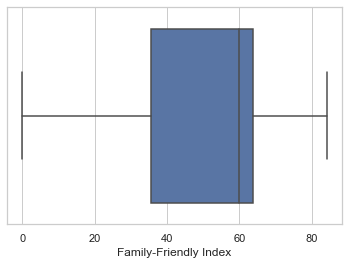

In [24]:
# we can quickly analyze the index distribution using a simple boxplot.

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(family_matrix['Family-Friendly Index'])


from the graph we see that no NIL observes the maximum value of **Family-Friendly Index**, which means that in order to select the best neighborhood, a family must also base its choice on other parameters. For this reason we will investigate through the **Foursquare API** which venues there are  in neighborhoods.

In [25]:
Borough_Family_Index = df_neighborhood[['Borough','Borough Name','ID_NIL','NIL']]
NIL_Family_Index = family_matrix[['ID_NIL','Family-Friendly Index']]
Family_Index = Borough_Family_Index.join(NIL_Family_Index.set_index('ID_NIL'), on='ID_NIL')
Family_Index.sort_values(by =['Family-Friendly Index'], ascending = False).head(10)

,Borough,Borough Name,ID_NIL,NIL,Family-Friendly Index
18,2,PORTA VENEZIA - BUENOS AIRES,21,BUENOS AIRES - VENEZIA,84.169014
23,3,PORTA VENEZIA - BUENOS AIRES,21,BUENOS AIRES - VENEZIA,84.169014
52,6,BANDE NERE - SELINUNTE,52,BANDE NERE,78.591549
67,7,BANDE NERE - SELINUNTE,52,BANDE NERE,78.591549
33,4,PORTA ROMANA - 22 MARZO,26,XXII MARZO,71.154930
4,1,CENTRO,7,MAGENTA - S. VITTORE,69.295775
104,9,MACIACHINI - BOVISA - DERGANO,77,BOVISA,69.295775
106,9,MACIACHINI - BOVISA - DERGANO,12,MACIACHINI - MAGGIOLINA,69.295775
20,3,CITTA' STUDI - LAMBRATE,22,CITTA' STUDI,69.295775
77,7,S. SIRO,60,S. SIRO,69.295775


<hr>

## 3. Explore and Clustering Neighbouroods

In this section we investigate characteristics of Neighbourhoods in terms of Family-Friendly Index, and venues.
We will cluster NIL in order to identify 5 typology, which let families with cildren to identify the best place to go to live.

In [26]:
#Lets plot on a map which is Family-Friendlu Index distribution

In [27]:
address = 'Milano, IT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milano are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milano are 45.4668, 9.1905.


In [28]:
# create map of Milano using latitude and longitude values
map_milano = folium.Map(location=[latitude, longitude], zoom_start=12)

In [29]:
#Importing geocode file
milano_geo = r'ds964_nil_wm.geojson' # geojson file

In [30]:
# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(Family_Index['Family-Friendly Index'].min(),
                              Family_Index['Family-Friendly Index'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration



map_milano.choropleth(
    geo_data=milano_geo,
    data=Family_Index,
    columns=['ID_NIL', 'Family-Friendly Index'],
    key_on='feature.properties.ID_NIL',
    threshold_scale=threshold_scale,
    fill_color='YlOrBr', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Family-Friendly Index',
    reset = True,
    highlight= True
)

# add markers to map
for Latitude, Longitude, borough, NIL in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Borough'], df_neighborhood['NIL']):
    label = '{}, {}'.format(NIL, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milano)  
    
map_milano

In [65]:
#Top 10 Neighbourhood
Family_Index.head()
Family_Index_un = Family_Index.drop(columns =['Borough'])
top10_neighborhood=Family_Index_un.sort_values(by =['Family-Friendly Index'], ascending = False).head(50)
top10_neighborhood.drop_duplicates().head(10)

,Borough Name,ID_NIL,NIL,Family-Friendly Index
18,PORTA VENEZIA - BUENOS AIRES,21,BUENOS AIRES - VENEZIA,84.169014
52,BANDE NERE - SELINUNTE,52,BANDE NERE,78.591549
33,PORTA ROMANA - 22 MARZO,26,XXII MARZO,71.154930
4,CENTRO,7,MAGENTA - S. VITTORE,69.295775
104,MACIACHINI - BOVISA - DERGANO,77,BOVISA,69.295775
106,MACIACHINI - BOVISA - DERGANO,12,MACIACHINI - MAGGIOLINA,69.295775
20,CITTA' STUDI - LAMBRATE,22,CITTA' STUDI,69.295775
77,S. SIRO,60,S. SIRO,69.295775
64,BAGGIO - MUGGIANO,55,BAGGIO,67.436620
31,PORTA ROMANA - 22 MARZO,27,PTA ROMANA,67.436620


### Find places for top 10 Neighbourhoods

In [32]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [66]:
#top_neighborhood_f = df_neighborhood[['NIL','ID_NIL','Latitude','Longitude']].query("(ID_NIL == 21) | (ID_NIL == 52) | (ID_NIL == 26) | (ID_NIL == 7) | (ID_NIL == 77) | (ID_NIL == 12) | (ID_NIL == 22) | (ID_NIL == 60)")
top_neighborhood_f = df_neighborhood[['NIL','ID_NIL','Latitude','Longitude']]
top_neighborhood_f.drop_duplicates(inplace=True)
top_neighborhood = top_neighborhood_f.groupby(['NIL','ID_NIL']).mean().reset_index()
top_neighborhood.head(10)

,NIL,ID_NIL,Latitude,Longitude
0,ADRIANO,17,45.511567,9.244967
1,AFFORI,80,45.514848,9.172868
2,BAGGIO,55,45.461216,9.088377
3,BANDE NERE,52,45.460334,9.138853
4,BARONA,46,45.432494,9.154109
5,BICOCCA,15,45.517181,9.210563
6,BOVISA,77,45.501838,9.165442
7,BOVISASCA,81,45.516937,9.154213
8,BRERA,2,45.476953,9.187232
9,BRUZZANO,83,45.526961,9.173317


In [34]:
# Foursquare Credentials
CLIENT_ID = 'AU22VEFS5ZUGLZMJCKXLYMWEQZYYUMPGP03PTEA440LFZWD2' # your Foursquare ID
CLIENT_SECRET = 'VBZL450SSY15H2ZTKX3LN45IJRLFKE1QCFWTO1KZTQ3KCADW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: AU22VEFS5ZUGLZMJCKXLYMWEQZYYUMPGP03PTEA440LFZWD2
CLIENT_SECRET:VBZL450SSY15H2ZTKX3LN45IJRLFKE1QCFWTO1KZTQ3KCADW


In [37]:
LIMIT = 100
radius = 500
# Explore Neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
# get Milano venues
top_neighborhood_venues = getNearbyVenues(names=top_neighborhood['NIL'],
                                   latitudes=top_neighborhood['Latitude'],
                                   longitudes=top_neighborhood['Longitude']
                                  )

print(top_neighborhood_venues.shape)
top_neighborhood_venues.head(10)

ADRIANO
AFFORI
BAGGIO
BANDE NERE
BARONA
BICOCCA
BOVISA
BOVISASCA
BRERA
BRUZZANO
BUENOS AIRES - VENEZIA
CANTALUPA
CENTRALE
CHIARAVALLE
CITTA' STUDI
CNA TRIULZA - EXPO
COMASINA
CORSICA
DE ANGELI - MONTE ROSA
DERGANO
DUOMO
Ex OM - MORIVIONE
FARINI
FIGINO
FORZE ARMATE
GALLARATESE
GARIBALDI REPUBBLICA
GHISOLFA
GIAMBELLINO
GRATOSOGLIO - TICINELLO
GRECO
GUASTALLA
Giardini Pta Venezia
ISOLA
LAMBRATE
LODI - CORVETTO
LORENTEGGIO
LORETO
MACIACHINI - MAGGIOLINA
MAGENTA - S. VITTORE
MAGGIORE - MUSOCCO
MECENATE
MUGGIANO
NAVIGLI
NIGUARDA - CA' GRANDA
ORTOMERCATO
PADOVA
PAGANO
PORTELLO
PTA ROMANA
Parco Agricolo Sud
Parco Bosco in città
Parco Forlanini - ORTICA
Parco Lambro - CIMIANO
Parco Monluè - PONTE LAMBRO
Parco Nord
Parco Sempione
Parco dei Navigli
Parco delle Abbazie
QT 8
QUARTO CAGNINO
QUARTO OGGIARO
QUINTO ROMANO
QUINTOSOLE
RIPAMONTI
ROGOREDO
RONCHETTO DELLE RANE
RONCHETTO S/N
S. CRISTOFORO
S. SIRO
SACCO
SARPI
SCALO ROMANA
SELINUNTE
STADERA
STEPHENSON
TIBALDI
TICINESE
TORTONA
TRE TORRI
TRENNO


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ADRIANO,45.511567,9.244967,Cargo,45.508406,9.243159,Furniture / Home Store
1,ADRIANO,45.511567,9.244967,Osteria Ai 3/4,45.508452,9.243858,Italian Restaurant
2,ADRIANO,45.511567,9.244967,Zan Zara Zan,45.508652,9.242995,Café
3,ADRIANO,45.511567,9.244967,Unieuro,45.514146,9.244038,Electronics Store
4,ADRIANO,45.511567,9.244967,Esselunga,45.513782,9.244425,Supermarket
5,ADRIANO,45.511567,9.244967,Fiordigelato,45.510663,9.247076,Ice Cream Shop
6,ADRIANO,45.511567,9.244967,big bag box,45.512286,9.244776,Hostel
7,ADRIANO,45.511567,9.244967,Bar Atlantic,45.512246,9.244081,Bistro
8,ADRIANO,45.511567,9.244967,Da Pinocchio,45.510434,9.246850,Italian Restaurant
9,ADRIANO,45.511567,9.244967,Lidl,45.512643,9.246790,Supermarket


In [39]:
#explore unique categories
top_neighborhood_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
ADRIANO,18,18,18,18,18,18
AFFORI,17,17,17,17,17,17
BAGGIO,12,12,12,12,12,12
BANDE NERE,19,19,19,19,19,19
BARONA,10,10,10,10,10,10
...,...,...,...,...,...,...
VIGENTINA,45,45,45,45,45,45
VILLAPIZZONE,28,28,28,28,28,28
VLE MONZA,21,21,21,21,21,21


In [40]:
print('There are {} uniques categories.'.format(len(top_neighborhood_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [41]:
# analyze each neighborhood

# one hot encoding
top_onehot = pd.get_dummies(top_neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
top_onehot['Neighbourhood'] = top_neighborhood_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [top_onehot.columns[-1]] + list(top_onehot.columns[:-1])
top_onehot = top_onehot[fixed_columns]

top_onehot.head()


,Neighbourhood,Abruzzo Restaurant,Accessories Store,Adult Education Center,African Restaurant,Airport,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,ADRIANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ADRIANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ADRIANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ADRIANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ADRIANO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# group by neighborhood and by taking the mean of the frequency of occurrence of each category
Top_grouped = top_onehot.groupby('Neighbourhood').mean().reset_index()
Top_grouped.shape

(88, 269)

In [43]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 10

for hood in Top_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Top_grouped[Top_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ADRIANO----
                    venue  freq
0      Italian Restaurant  0.22
1             Supermarket  0.11
2       Electronics Store  0.06
3  Furniture / Home Store  0.06
4                Bus Stop  0.06
5     Sporting Goods Shop  0.06
6                  Hostel  0.06
7                  Bistro  0.06
8             Coffee Shop  0.06
9            Soccer Field  0.06


----AFFORI----
                 venue  freq
0          Pizza Place  0.18
1                 Park  0.12
2   Italian Restaurant  0.12
3            Pool Hall  0.06
4                 Café  0.06
5    Health Food Store  0.06
6          Supermarket  0.06
7                Hotel  0.06
8         Cocktail Bar  0.06
9  Fried Chicken Joint  0.06


----BAGGIO----
                 venue  freq
0          Pizza Place  0.17
1   Italian Restaurant  0.17
2                Plaza  0.08
3            Gastropub  0.08
4                  Bar  0.08
5                 Park  0.08
6          Supermarket  0.08
7                 Café  0.08
8    Convenience S

In [44]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
# create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = Top_grouped['Neighbourhood']

for ind in np.arange(Top_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Top_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape

(88, 11)

In [46]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 10

Top_grouped_clustering = Top_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Top_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]


array([4, 8, 4, 8, 8, 8, 4, 4, 4, 4, 4, 0, 0, 4, 8], dtype=int32)

In [47]:
Top_merged = top_neighborhood
Top_merged.shape
#add clustering labels
Top_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Top_merged = Top_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='NIL')

Top_merged.head(10) # check the last columns!

,NIL,ID_NIL,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,17,45.511567,9.244967,4,Italian Restaurant,Supermarket,Sporting Goods Shop,Bistro,Coffee Shop,Bus Stop,Electronics Store,Bakery,Café,Hostel
1,AFFORI,80,45.514848,9.172868,8,Pizza Place,Park,Italian Restaurant,Supermarket,Hotel,Cocktail Bar,Bakery,Health Food Store,Café,Fried Chicken Joint
2,BAGGIO,55,45.461216,9.088377,4,Pizza Place,Italian Restaurant,Café,Supermarket,Plaza,Convenience Store,Japanese Restaurant,Bar,Gastropub,Park
3,BANDE NERE,52,45.460334,9.138853,8,Restaurant,Pizza Place,Hotel,Ice Cream Shop,Café,Plaza,Hobby Shop,Hostel,Cosmetics Shop,Athletics & Sports
4,BARONA,46,45.432494,9.154109,8,Soccer Field,Bakery,Theater,Tennis Stadium,Athletics & Sports,Café,Japanese Restaurant,Food Court,Trattoria/Osteria,Fountain
5,BICOCCA,15,45.517181,9.210563,8,Café,Sushi Restaurant,Italian Restaurant,Plaza,Restaurant,Pizza Place,Trattoria/Osteria,Gym Pool,Seafood Restaurant,Theater
6,BOVISA,77,45.501838,9.165442,4,Italian Restaurant,Platform,Café,Snack Place,Ice Cream Shop,Piadineria,Hotel,Brewery,Steakhouse,Paper / Office Supplies Store
7,BOVISASCA,81,45.516937,9.154213,4,Clothing Store,Supermarket,Soccer Field,Park,Shopping Plaza,Chinese Restaurant,Pizza Place,Men's Store,Cosmetics Shop,Shoe Store
8,BRERA,2,45.476953,9.187232,4,Italian Restaurant,Ice Cream Shop,Restaurant,Café,Plaza,Japanese Restaurant,Wine Bar,Cocktail Bar,Seafood Restaurant,Hotel
9,BRUZZANO,83,45.526961,9.173317,4,Italian Restaurant,Bakery,Diner,Gym / Fitness Center,Bus Stop,Pizza Place,Train Station,Gift Shop,Empanada Restaurant,Event Space


In [48]:
# create map of Milano using latitude and longitude values
map_cluster_milano = folium.Map(location=[latitude, longitude], zoom_start=12)

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(Family_Index['Family-Friendly Index'].min(),
                              Family_Index['Family-Friendly Index'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


map_cluster_milano.choropleth(
    geo_data=milano_geo,
    data=Family_Index,
    columns=['ID_NIL', 'Family-Friendly Index'],
    key_on='feature.properties.ID_NIL',
    threshold_scale=threshold_scale,
    fill_color='YlOrBr', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Family-Friendly Index',
    reset = True,
    highlight= True)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Top_merged['Latitude'], Top_merged['Longitude'], Top_merged['NIL'], Top_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cluster_milano)
       
map_cluster_milano

In [49]:
# Cluster 1 
Top_merged.loc[Top_merged['Cluster Labels'] == 0, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,CANTALUPA,Restaurant,Café,Hotel,Mediterranean Restaurant,General Entertainment,Gay Bar,Gastropub,Garden,German Restaurant,Gift Shop
12,CENTRALE,Hotel,Café,Italian Restaurant,Pizza Place,Restaurant,Ice Cream Shop,Bistro,Sandwich Place,Tram Station,Chinese Restaurant
51,Parco Bosco in città,Restaurant,Brazilian Restaurant,Hotel,Park,Nightclub,Yoga Studio,Furniture / Home Store,Football Stadium,Fountain,French Restaurant
75,STEPHENSON,Hotel,Café,Spa,Restaurant,Dog Run,Food Court,German Restaurant,General Entertainment,Gay Bar,Gastropub


In [50]:
# Cluster 2
Top_merged.loc[Top_merged['Cluster Labels'] == 1, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Parco Agricolo Sud,Mediterranean Restaurant,Garden,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Yoga Studio,Food & Drink Shop


In [51]:
# Cluster 3 
Top_merged.loc[Top_merged['Cluster Labels'] == 2, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,QUINTO ROMANO,Bar,Playground,Supermarket,Soccer Field,Yoga Studio,French Restaurant,Food Truck,Football Stadium,Fountain,Fried Chicken Joint


In [52]:
# Cluster 4 
Top_merged.loc[Top_merged['Cluster Labels'] == 3, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
66,RONCHETTO DELLE RANE,Bed & Breakfast,Yoga Studio,Garden,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,Grocery Store


In [53]:
# Cluster 5 
Top_merged.loc[Top_merged['Cluster Labels'] == 4, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADRIANO,Italian Restaurant,Supermarket,Sporting Goods Shop,Bistro,Coffee Shop,Bus Stop,Electronics Store,Bakery,Café,Hostel
2,BAGGIO,Pizza Place,Italian Restaurant,Café,Supermarket,Plaza,Convenience Store,Japanese Restaurant,Bar,Gastropub,Park
6,BOVISA,Italian Restaurant,Platform,Café,Snack Place,Ice Cream Shop,Piadineria,Hotel,Brewery,Steakhouse,Paper / Office Supplies Store
7,BOVISASCA,Clothing Store,Supermarket,Soccer Field,Park,Shopping Plaza,Chinese Restaurant,Pizza Place,Men's Store,Cosmetics Shop,Shoe Store
8,BRERA,Italian Restaurant,Ice Cream Shop,Restaurant,Café,Plaza,Japanese Restaurant,Wine Bar,Cocktail Bar,Seafood Restaurant,Hotel
9,BRUZZANO,Italian Restaurant,Bakery,Diner,Gym / Fitness Center,Bus Stop,Pizza Place,Train Station,Gift Shop,Empanada Restaurant,Event Space
10,BUENOS AIRES - VENEZIA,Italian Restaurant,Pizza Place,Bakery,Hotel,Dessert Shop,Plaza,Cosmetics Shop,Restaurant,Korean Restaurant,Indian Restaurant
13,CHIARAVALLE,Diner,Italian Restaurant,Convenience Store,Restaurant,Doner Restaurant,Dumpling Restaurant,Gift Shop,German Restaurant,General Entertainment,Gay Bar
18,DE ANGELI - MONTE ROSA,Café,Italian Restaurant,Hotel,Bar,Pizza Place,Japanese Restaurant,Plaza,Piadineria,Asian Restaurant,Supermarket
20,DUOMO,Hotel,Italian Restaurant,Plaza,Monument / Landmark,Ice Cream Shop,Café,Coffee Shop,Boutique,Art Gallery,Bakery


In [54]:
# Cluster 6 
Top_merged.loc[Top_merged['Cluster Labels'] == 5, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,QUARTO OGGIARO,Supermarket,Park,Yoga Studio,Furniture / Home Store,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Gastropub


In [55]:
# Cluster 7
Top_merged.loc[Top_merged['Cluster Labels'] == 6, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Parco dei Navigli,Café,Yoga Studio,Food Court,Gourmet Shop,Gift Shop,German Restaurant,General Entertainment,Gay Bar,Gastropub,Garden


In [56]:
# Cluster 8
Top_merged.loc[Top_merged['Cluster Labels'] == 7, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,FIGINO,Stadium,Bakery,Volleyball Court,Furniture / Home Store,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Garden


In [57]:
# Cluster 9
Top_merged.loc[Top_merged['Cluster Labels'] == 8, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,AFFORI,Pizza Place,Park,Italian Restaurant,Supermarket,Hotel,Cocktail Bar,Bakery,Health Food Store,Café,Fried Chicken Joint
3,BANDE NERE,Restaurant,Pizza Place,Hotel,Ice Cream Shop,Café,Plaza,Hobby Shop,Hostel,Cosmetics Shop,Athletics & Sports
4,BARONA,Soccer Field,Bakery,Theater,Tennis Stadium,Athletics & Sports,Café,Japanese Restaurant,Food Court,Trattoria/Osteria,Fountain
5,BICOCCA,Café,Sushi Restaurant,Italian Restaurant,Plaza,Restaurant,Pizza Place,Trattoria/Osteria,Gym Pool,Seafood Restaurant,Theater
14,CITTA' STUDI,Café,Pizza Place,Tram Station,Restaurant,Bar,Pub,Radio Station,Pool,Gym,Food Truck
15,CNA TRIULZA - EXPO,Italian Restaurant,Café,Playground,Recreation Center,Pizza Place,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant
16,COMASINA,Bus Station,Café,Fast Food Restaurant,Hostel,Restaurant,General Entertainment,Bakery,Gym / Fitness Center,Pizza Place,Metro Station
17,CORSICA,Café,Bakery,Italian Restaurant,Pizza Place,Hotel,Chinese Restaurant,Gym,Noodle House,Tennis Court,Convenience Store
19,DERGANO,Pizza Place,Plaza,Park,Café,Bistro,Gym / Fitness Center,Performing Arts Venue,Peruvian Restaurant,Pet Store,Food Court
21,Ex OM - MORIVIONE,Café,Pizza Place,Tram Station,Lebanese Restaurant,Piadineria,Breakfast Spot,Sri Lankan Restaurant,Nightclub,Music Venue,Supermarket


In [58]:
# Cluster 10
Top_merged.loc[Top_merged['Cluster Labels'] == 9, Top_merged.columns[[0] + list(range(5, Top_merged.shape[1]))]]

,NIL,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
55,Parco Nord,Soccer Field,Hotel,Football Stadium,Fried Chicken Joint,Food Court,Food Truck,Fountain,French Restaurant,Furniture / Home Store,Government Building


<hr>

## 4. Results and Discussion section

First of all, we can say that Milano could be not so bad for families with young children, despite its being a crowded and business oriented city.

Said this, we may discuss our results under two main perspectives:

 + Family-Friendly Index 
 + Venues got from Foursquare

Analysing the Family-Friendly Index we have found the best neighbourhoods (in our dataset NIL) in terms of presence of schools and paediatricians.

We can notice that the top 10 neighbourhoods are located around the city center, but close to it. Thats quite normal in a city where the city center is commercial-oriented.

The top 10 neighbourhoods in term of Family-Friendly Index fall in only two clusters: 8 (turchese) and 4 (orange).

The cluster 4 will be chosen by parents who prefer to live in a place characterised by an high presence of Supermarkets, Parks, Gardens and easy Italian restaurant such as Pizza Place.

The cluster 8 will best fits people who prefer a multicultural environment, with a high presence of Ethnic restaurants, Pubs and Café.


<hr>

## 5. Conclusion

We obtained good results, but some improvements are needed in order to get a more detailed analysis:

 + Enrichment of Family-Friendly Index with more data such as: 
    + Pharmacies
    + Playgrounds
    + Metro, Bus, Tram station
    + Shops for kids (Toys, Cloths)

 + Clustering algorithm investigation: we used K-Means, but probably a density approach would give better results (for example DBSCSN).
 